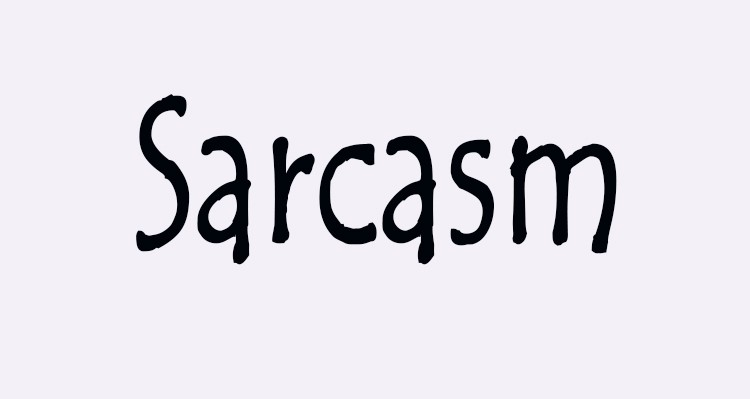

**Introduction**

Word **Sarcasm** oftenly defined as cutting ,ironic remark intended to express comtempt. 

***Sarcasm Detection** is the classification task for the correct labelling as 'sarcastic' or 'non-sarcastic'. It's a challanging task in text clasiification without knowing the facial expressions and with lack of information.

In Natural Language Processing recognizing sarcasm in text is an important task to avoid misinterpretation of sarcastic statements as literal statements. 

For example, a sentence like **''So thrilled to be on call for work the entire weekend!''** could be naively classified as a sentence with a high positive sentiment. However, its actually the negative sentiment that is cleverly implied through sarcasm. 

The use of sarcasm is prevalent across all social media, micro-blogging and e-commerce platforms. Sarcasm detection is imperative for accurate sentiment analysis and opinion mining. It could contribute to enhanced automated feedback systems in the context of customer based sites. Twitter is a micro-blogging platform extensively used by people to express thoughts, reviews, discussions on current events and convey information in the form of short texts. Twitter data provides a diverse corpus for sentences which implicitly contain sarcasm. The target is to train a machine-learning algorithm so that it can predict where sarcasm will appear in future.


**Dataset Information**

Each record consists of three attributes:

is_sarcastic: 1 if the record is sarcastic otherwise 0

headline: the headline of the news article

article_link: link to the original news article. Useful in collecting supplementary data


**Problem Statement**

Can you identify sarcastic sentences? Can you distinguish between fake news and legitimate news?

# **Predicting Sarcasm in Text Part 1**

## it_nltmapdj_02_enus_06

*What you will learn and explore in this section*:-

- Installation of Libraries
- Importing required Libraries
- Library component and Usecases by each component and explanation

In [ ]:
!pip install contractions

In [ ]:
# Supporting scientific library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visulization Library
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px

# Text Pre-processing Libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
import contractions
from nltk.stem import SnowballStemmer

#perfprmance and train test split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Unzipping the folder
# !unzip /content/Course_4_scarcsm data.zip

### Data Loading

In [ ]:
data = pd.read_json('https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json',lines=True)

In [ ]:
data.head()

### Data Description

In [ ]:
print(data.info())
print('------------------[Data Description]--------------------')
print(data.describe())

### Checking NAN Values

In [ ]:
print("Null Values\n",data.isnull().sum())
print("\nData Shape: " , data.shape)

Observation

- There is no NULL values
- We have 3 columns and approximately 28K rows

In [ ]:
data.is_sarcastic.value_counts()

### Number of words in headlines

In [ ]:
# Let's check number of words in the given dataset

def number_of_words(data):
    WL = []
    list_of_words = data.str.split()
    for i in range(len(list_of_words)):
        for j in range(len(list_of_words[i])):
            WL.append(list_of_words[i][j])
            
    set_of_words = set(WL)
    
    print(len(set_of_words),len(WL))

number_of_words(data.headline)

### Article link preprocessing

In [ ]:
data['web'] = data['article_link'].apply(lambda x: x.split('.')[1])
data = data.drop('article_link' , axis = 1)
data.head()

# **Predicting Sarcasm in Text Part 2**

## it_nltmapdj_02_enus_07

### Exploratory Data Analysis (EDA) of Data

#### is_scarstic Analysis

In [ ]:
print(data.is_sarcastic.value_counts() ,"\n")

print('------------------[IS_SARCASTIC ANALYSIS]-------------------')

target_counts=data['is_sarcastic'].value_counts()
plt.figure(figsize = (8,6))
sns.barplot(y=target_counts,x=target_counts.index)
plt.title("Count of real and fake data",fontsize = 24)
plt.ylabel('count')
plt.xlabel('Target')

In [ ]:
px.pie(data,names='is_sarcastic',labels=['Sarcastic','Acclaim'],title='Sarcasam Vs Acclaim',template='plotly_white')

#### Web link Analysis

In [ ]:
ax = sns.countplot(x="web",  hue='is_sarcastic', data=data, palette="Reds")
plt.title("Distribution of The Sarcasm According to Site");

In [ ]:
data['message_len'] = data['headline'].apply(lambda x: len(x.split(' ')))
data.head()

In [ ]:
sarcastic_data = data[data['is_sarcastic'] == 1]['message_len'].value_counts().sort_index()
not_sarcastic_data = data[data['is_sarcastic'] == 0]['message_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=sarcastic_data.index,
    y=sarcastic_data.values,
    name='Sarcastic',
    fill='tozeroy',
    marker_color='#202024',
))
fig.add_trace(go.Scatter(
    x=not_sarcastic_data.index,
    y=not_sarcastic_data.values,
    name='Acclaim',
    fill='tozeroy',
    marker_color='#815836',
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Data Roles according to Labels</span>'
)
fig.update_xaxes(range=[0, 50])
fig.show()

# **Predicting Sarcasm in Text 3**

## it_nltmapdj_02_enus_08

### Pre-processing using Regex

In [ ]:
data['headline']=data['headline'].str.lower()
# Code to remove the Hashtags from the text
data['headline']=data['headline'].apply(lambda x:re.sub(r'\B#\S+','',x))
# Code to remove the links from the text
data['headline']=data['headline'].apply(lambda x:re.sub(r"http\S+", "", x))
# Code to remove the Special characters from the text 
data['headline']=data['headline'].apply(lambda x:' '.join(re.findall(r'\w+', x)))
# Code to substitute the multiple spaces with single spaces
data['headline']=data['headline'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
# Code to remove all the single characters in the text
data['headline']=data['headline'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Remove the twitter handlers
data['headline']=data['headline'].apply(lambda x:re.sub('@[^\s]+','',x))

# **Predicting Sarcasm in Text 4**

## it_nltmapdj_02_enus_09

In [ ]:
nltk.download('stopwords')

### Preprocessing -  Stop word removal

In [ ]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
data['headline_clean'] = data['headline'].apply(remove_stopwords)
data.head()

### Preprocessing - Tokenization

In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

data['tokenized'] = data['headline_clean'].apply(lambda x: tokenization(x.lower()))
data.head()

In [ ]:
sarcastic = data[data['is_sarcastic']==0]['headline_clean']
sarcastic[:10]

In [ ]:
not_sarcastic = data[data['is_sarcastic']==1]['headline_clean']
not_sarcastic[:10]

### Preprocessing - Stemming

In [ ]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

data['headline_clean'] = data['headline_clean'].apply(stemm_text)
data.head()

### Word Cloud

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 1500 , width = 800 , height = 500).generate(" ".join(data[data.is_sarcastic == 0].headline_clean))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.is_sarcastic == 1].headline_clean))
plt.imshow(wc , interpolation = 'bilinear')

### 100 MOST FREQUENTLY OCCURING WORDS

In [ ]:
all_words=[]
for i in range(len(data['tokenized'])):
    a=data['tokenized'][i]
    for i in a:
        all_words.append(i)
all_words=pd.Series(np.array(all_words))
print(all_words)

In [ ]:
# !pip install plotly
# !pip install --upgrade plotly
# !pip uninstall plotly

In [ ]:
common_words=all_words.value_counts()[:100].rename_axis('Common Words').reset_index(name='count')
common_words
fig = px.treemap(common_words, values='count',template= "plotly_white",
                 title='100 Most Common Words In Headline', path = [px.Constant('common words')])
fig.show()

# **Predicting Sarcasm in Text 5**

#it_nltmapdj_02_enus_10

### Train - Test Split

In [ ]:
#Spliting it into training and testing 
X = data['headline_clean']
y = data['is_sarcastic']


# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

### Vector Conversion

In [ ]:
cv = CountVectorizer(ngram_range=(1,3))
X_cv_train = cv.fit_transform(x_train)
X_cv_test = cv.transform(x_test)

### Decision Tree Model

In [ ]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_cv_train, y_train)

from sklearn import tree
tree.plot_tree(tree_model)
plt.savefig('DT.pdf')
plt.show()

In [ ]:
y_pred = tree_model.predict(X_cv_test)
test = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(test, predictions)

print('accuracy:', accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test,y_pred))

acc_tree = accuracy_score(y_test,y_pred)

### Logistic Regression Model

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_cv_train, y_train)

In [ ]:
logreg.score(X_cv_train, y_train)

In [ ]:
y_pred_logr = logreg.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_logr))
print('f1-score:', f1_score(y_test,y_pred_logr))

acc_logr = accuracy_score(y_test,y_pred_logr)

### SVM model

In [ ]:
model = svm.SVC(kernel='linear', gamma=1) 
model.fit(X_cv_train, y_train)

In [ ]:
model.score(X_cv_train, y_train)

In [ ]:
y_pred_svm= model.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_svm))
print('f1-score:', f1_score(y_test,y_pred_svm))

acc_svm = accuracy_score(y_test,y_pred_svm)

### Random Forest model

In [ ]:
forest = RandomForestClassifier (criterion='gini',
                                n_estimators=12, 
                                random_state=1)
forest.fit(X_cv_train, y_train)

In [ ]:
forest.score(X_cv_train, y_train)

In [ ]:
y_pred_forest= forest.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_forest))
print('f1-score:', f1_score(y_test,y_pred_forest))

acc_rf = accuracy_score(y_test,y_pred_forest)

### Naive Bayes model

In [ ]:
nb=MultinomialNB()
nb.fit(X_cv_train, y_train)

In [ ]:
nb.score(X_cv_train, y_train)

In [ ]:
y_pred_nb= nb.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_nb))
print('f1-score:', f1_score(y_test,y_pred_nb))

acc_nb = accuracy_score(y_test,y_pred_nb)

In [ ]:
print(classification_report(y_test,y_pred_nb))

### KNN model

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_cv_train, y_train)

In [ ]:
y_pred_knn= knn.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_knn))
print('f1-score:', f1_score(y_test,y_pred_knn))

In [ ]:
acc_knn = accuracy_score(y_test,y_pred_knn)

comparison of models

In [ ]:
models = ['DesicionTree','LogReg','SVM', 'RandomForest', 'NaiveBayes', 'kNN']
col = [acc_tree, acc_logr, acc_svm, acc_rf, acc_nb, acc_knn]
data = {'Models':models,'Accuracy':col}
graph_df = pd.DataFrame(data)
graph_df

In [ ]:
graph_df = graph_df.sort_values(by=['Accuracy'], axis = 0, ascending=False)

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=graph_df['Models'], y=graph_df['Accuracy'], data=graph_df);